## Two neuron example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(10000) #examples

## generate some features for training data
X = np.random.rand(n,p)-0.5

## generate labels of the feature vectors with known functions
## Note that sign()/2+0.5 maps output to be 0 or 1, 
## which is the range of the activation fuction
Y1 = np.sign(-2*X[:,[0]]+.2-X[:,[1]])/2+.5
Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])/2+.5
Y = np.hstack((Y1, Y2))


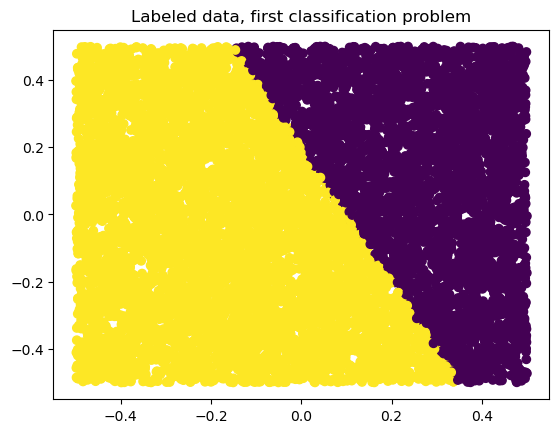

In [2]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=Y1.flatten())
plt.title('Labeled data, first classification problem')
plt.show()

In [ ]:
# Problem 1a comment: Yes, a single neuron should be able to 
# classify this data well because it appears to be linearly separable.
# The bias term w_1,0 is crucial for this to work though.
# It represents the y-intercept of the decision boundary.

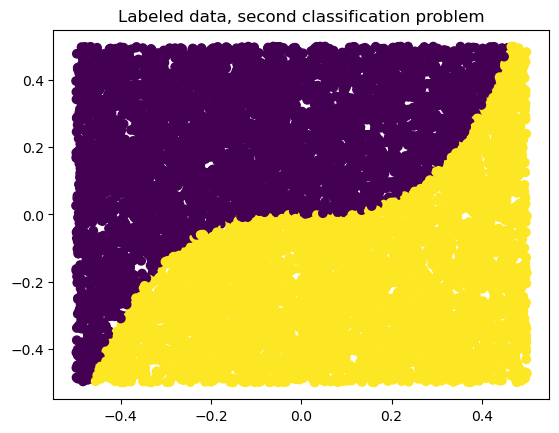

In [3]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], c=Y2.flatten())
plt.title('Labeled data, second classification problem')
plt.show()

In [4]:
# Problem 1b comment: No, a single neuron will not be able to 
# accurately classify this data. A single neuron can only learn to classify
# data linearly (straight line decision boundary).
# The bias term w_2,0 in this case would add a y-intercept to the linear
# decision boundary, so we would at least get the best possible line.

In [49]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes

## initial weights
W = np.random.randn(p+1, q);

alpha = 0.1 #step size
L = 20 #number of epochs

R = 5 # num trials

def logsig(_x):
    return 1/(1+np.exp(-_x))

classifier_1_num_errors = []
classifier_2_num_errors = []

for a in range(R):
    
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate 
            Yhat = logsig(Xb[[i],:]@W) 
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Wnew = W - alpha*Xb[[i],:].T@delta
            W = Wnew
        #print('epoch: ', epoch)

    ## Final predicted labels (on training data)
    H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
    Yhat = logsig(Xb@W)

    err_c1 = np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
    #print('Errors, first classification problem:', err_c1)

    err_c2 = np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
    #print('Errors, second classification problem:', err_c2)
    
    classifier_1_num_errors.append(err_c1)
    classifier_2_num_errors.append(err_c2)

print(f"Mean # errors, classifier 1, {R} trials of {L} epochs: {np.mean(classifier_1_num_errors)}")
print(f"Mean # errors, classifier 2, {R} trials of {L} epochs: {np.mean(classifier_2_num_errors)}")

Mean # errors, classifier 1, 5 trials of 20 epochs: 32.8
Mean # errors, classifier 2, 5 trials of 20 epochs: 749.4


In [35]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(Xb@W)
Yhat

array([[0.96135348, 0.20072283],
       [0.92912235, 0.28485906],
       [0.08178421, 0.26543595],
       ...,
       [0.91501647, 0.52431855],
       [0.87858765, 0.49821453],
       [0.68322586, 0.28075355]])

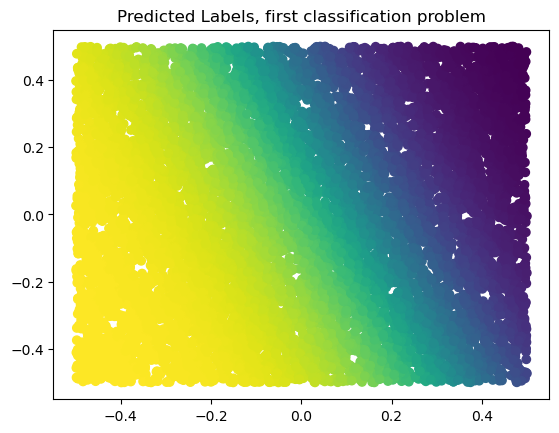

In [36]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classification problem')
plt.show()

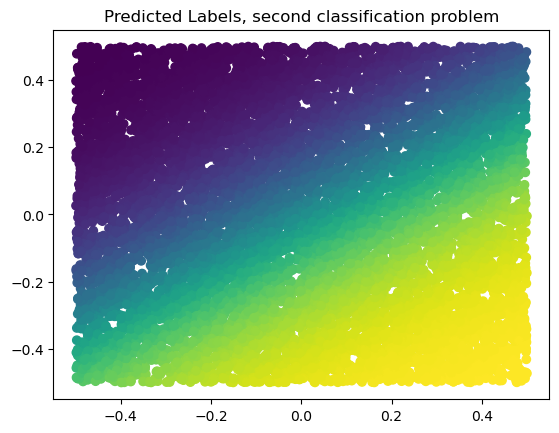

In [37]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classification problem')
plt.show()

In [38]:
err_c1 = np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
print('Errors, first classification problem:', err_c1)

err_c2 = np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
print('Errors, second classification problem:', err_c2)

Errors, first classification problem: 229.0
Errors, second classification problem: 758.0
